<a href="https://colab.research.google.com/github/prasannashrestha011/ML_exercises/blob/main/StudentGPA_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
waqi786_student_performance_dataset_path = kagglehub.dataset_download('waqi786/student-performance-dataset')

print('Data source import complete.')


Using Colab cache for faster access to the 'student-performance-dataset' dataset.
Data source import complete.


In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance-dataset/student_performance_data.csv


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer

from sklearn.metrics import accuracy_score,mean_squared_error,r2_score

In [18]:
df=pd.read_csv("/kaggle/input/student-performance-dataset/student_performance_data.csv")
df.head()

,StudentID,Gender,Age,StudyHoursPerWeek,AttendanceRate,GPA,Major,PartTimeJob,ExtraCurricularActivities
0,1,Male,24,37,90.75,3.47,Arts,Yes,No
1,2,Female,22,37,74.90,2.32,Education,No,No
2,3,Male,22,10,53.36,2.38,Business,No,No
3,4,Male,24,10,70.26,3.46,Science,Yes,No
4,5,Male,18,19,74.87,2.31,Education,Yes,No


In [19]:
df.isna().sum()

,0
StudentID,0
Gender,0
Age,0
StudyHoursPerWeek,0
AttendanceRate,0
GPA,0
Major,0
PartTimeJob,0
ExtraCurricularActivities,0


In [20]:
corr_matrix=df.select_dtypes(include='number').corr()
corr_matrix

,StudentID,Age,StudyHoursPerWeek,AttendanceRate,GPA
StudentID,1.000000,-0.019205,0.017845,-0.033530,-0.061763
Age,-0.019205,1.000000,-0.015695,0.037364,0.095805
StudyHoursPerWeek,0.017845,-0.015695,1.000000,0.095716,0.091700
AttendanceRate,-0.033530,0.037364,0.095716,1.000000,0.060828
GPA,-0.061763,0.095805,0.091700,0.060828,1.000000


<Axes: >

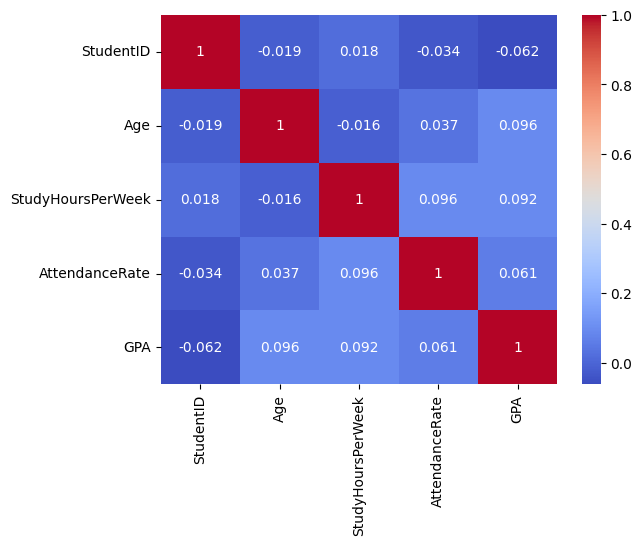

In [21]:
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')

Features are independent of each other as correlations are lower

In [22]:
pd.DataFrame(df.groupby(['Gender','AttendanceRate','StudyHoursPerWeek','Major'])['GPA'].mean())

GPA
Gender AttendanceRate StudyHoursPerWeek Major          
Female 50.17          10                Business   3.62
       50.26          24                Business   3.75
       50.45          22                Arts       2.42
       50.89          2                 Arts       2.27
       50.92          37                Arts       2.31
...                                                 ...
Male   98.10          20                Education  3.52
       98.11          20                Business   3.96
       98.23          4                 Arts       3.24
       99.33          22                Education  2.25
       99.46          37                Science    3.35

[500 rows x 1 columns]

In [23]:
print(df['Major'].unique())

print(df['Major'].value_counts())

['Arts' 'Education' 'Business' 'Science' 'Engineering']
Major
Business       114
Engineering    109
Arts           100
Education       97
Science         80
Name: count, dtype: int64


In [24]:
average_gpa_per_major=df.groupby('Major')['GPA'].mean()
average_gpa_per_major

,GPA
Major,
Arts,3.007100
Business,3.035965
Education,2.938866
Engineering,2.972844
Science,2.958250


GPA from STEM fields seems to be lower compare to other fields

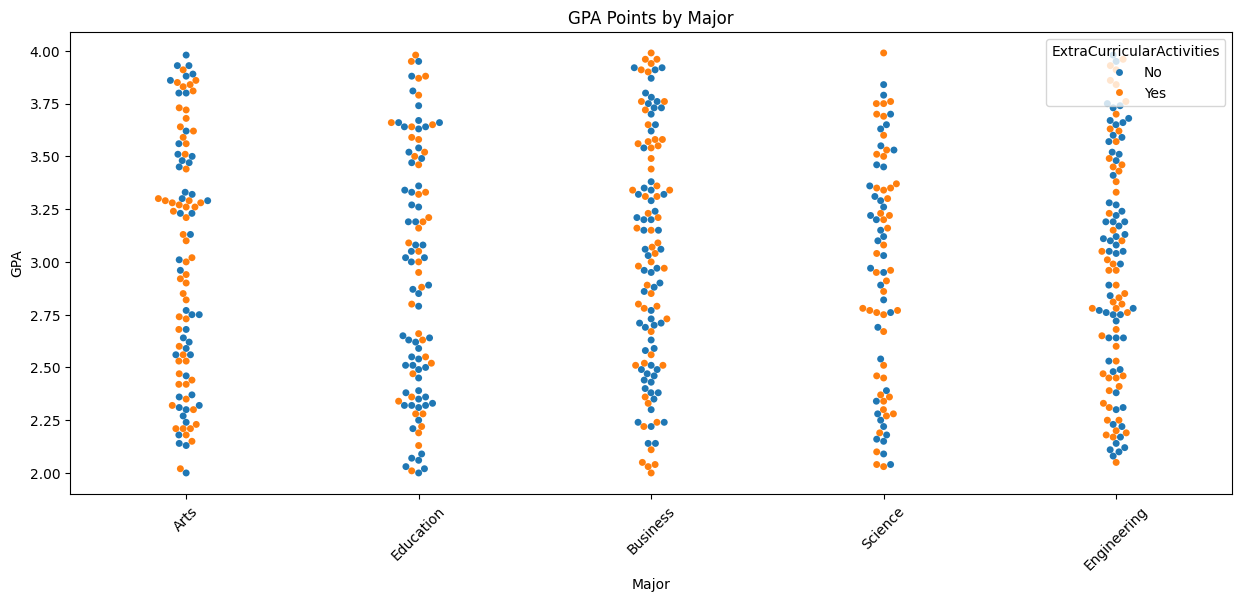

In [25]:
plt.figure(figsize=(15,6))
sns.swarmplot(x='Major', y='GPA',hue='ExtraCurricularActivities', data=df)
plt.title("GPA Points by Major")
plt.xticks(rotation=45)
plt.show()


In [26]:
df.groupby('PartTimeJob')['GPA'].describe()

,count,mean,std,min,25%,50%,75%,max
PartTimeJob,,,,,,,,
No,232.0,2.960690,0.533782,2.02,2.505,2.97,3.3400,3.98
Yes,268.0,3.006343,0.588402,2.00,2.470,3.01,3.5225,3.99


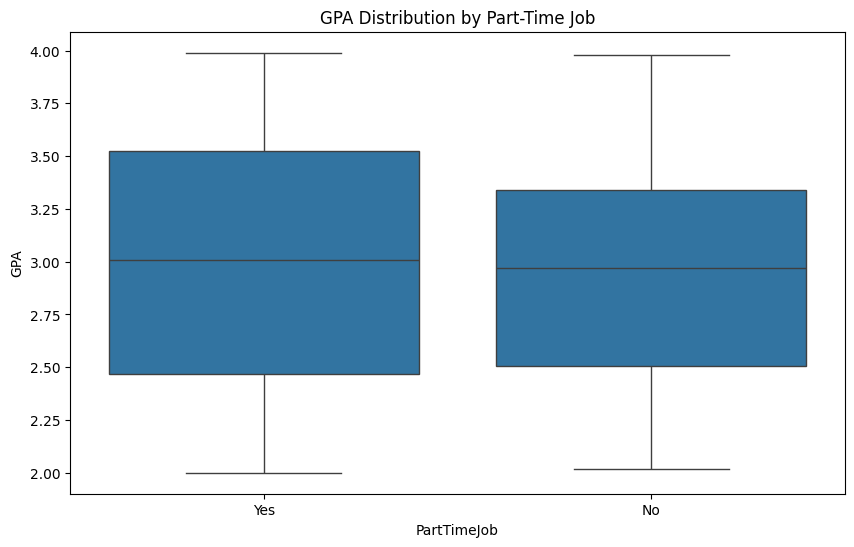

In [27]:
plt.figure(figsize=(10,6))
sns.boxplot(x='PartTimeJob', y='GPA', data=df)
plt.title("GPA Distribution by Part-Time Job")
plt.show()


we can observe that students with Part time job did better in their academics than students who dont.

# GPA based on Age group #

([<matplotlib.patches.Wedge at 0x78dc70ba6990>,
 [Text(0.9360939100669513, 0.5776921252151241, '22'),
  Text(-0.027643190528958403, 1.0996526060612868, '19'),
  Text(-0.9174863013486848, 0.6068104208379339, '18'),
  Text(-1.0349687608309914, -0.3726119484181394, '21'),
  Text(-0.35303779893381315, -1.0418081937304817, '24'),
  Text(0.5116665750998364, -0.9737542379500095, '23'),
  Text(1.0302049969151323, -0.38558742761025305, '20')],
 [Text(0.510596678218337, 0.31510479557188587, '17.6%'),
  Text(-0.015078103924886399, 0.5998105123970655, '15.6%'),
  Text(-0.500447073462919, 0.3309875022752366, '15.0%'),
  Text(-0.5645284149987225, -0.20324288095534873, '14.6%'),
  Text(-0.19256607214571625, -0.5682590147620808, '14.0%'),
  Text(0.2790908591453653, -0.5311386752454597, '11.8%'),
  Text(0.5619299983173449, -0.21032041506013802, '11.4%')])

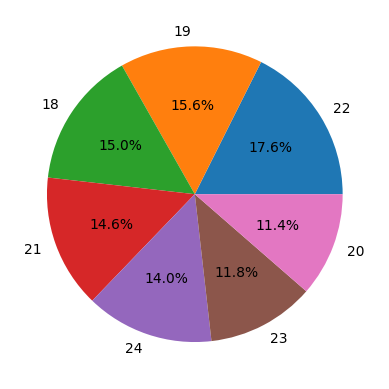

In [28]:
age_count=df['Age'].value_counts()
plt.pie(age_count.values,labels=age_count.index,autopct='%1.1f%%')

In [29]:
df.groupby('Age')['GPA'].mean()

,GPA
Age,
18,2.874533
19,3.009615
20,2.908947
21,3.005753
22,2.910000
23,3.195932
24,3.033857


<Axes: xlabel='Age', ylabel='GPA'>

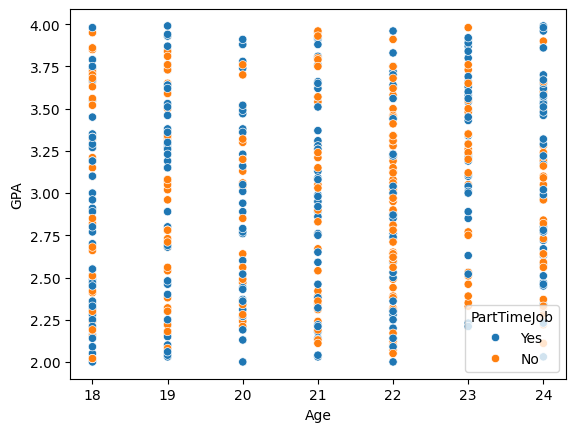

In [30]:
sns.scatterplot(x='Age', y='GPA', hue='PartTimeJob', data=df)


# GPA based on Gender #

([<matplotlib.patches.Wedge at 0x78dc70ac2660>,
 [Text(-0.04145937069253646, 1.099218413501966, 'Female'),
  Text(0.0414598599004003, -1.0992183950503374, 'Male')],
 [Text(-0.022614202195928974, 0.5995736800919814, '51.2%'),
  Text(0.02261446903658198, -0.5995736700274567, '48.8%')])

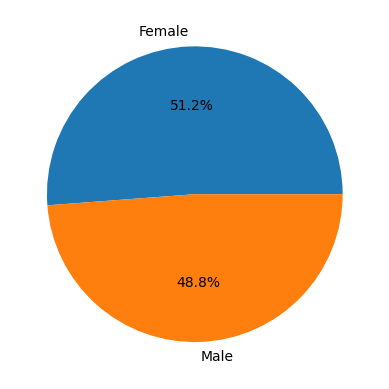

In [31]:
gender_count=df['Gender'].value_counts()

plt.pie(gender_count.values, labels=gender_count.index, autopct='%1.1f%%')

Text(0.5, 1.0, 'Distribution of GPA according to gender')

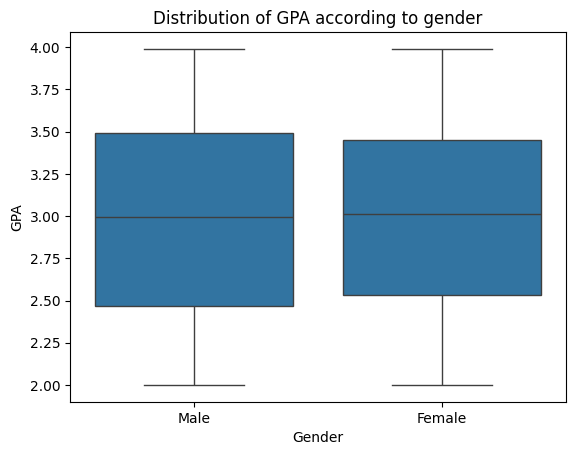

In [32]:
sns.boxplot(x='Gender',y='GPA',data=df)
plt.title("Distribution of GPA according to gender")

<Axes: xlabel='Major', ylabel='AttendanceRate'>

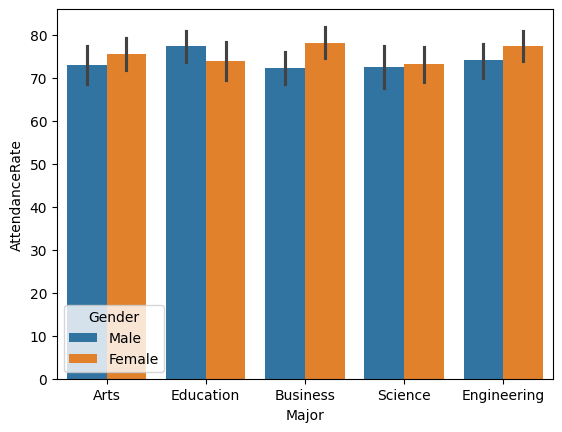

In [33]:
sns.barplot(x='Major', y='AttendanceRate', data=df, hue='Gender')


In [63]:
# Gender: Male=1, Female=0
df['Encoded_Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

# ExtraCurricularActivities: Yes=1, No=0
df['ExtraCurricularActivities_Yes'] = df['ExtraCurricularActivities'].apply(lambda x: 1 if x == 'Yes' else 0)

# PartTimeJob: Yes=1, No=0
df['PartTimeJob_Yes'] = df['PartTimeJob'].apply(lambda x: 1 if x == 'Yes' else 0)


# Gender × ExtraCurricularActivities
df['Gender_ExtraCurricular'] = df['Encoded_Gender'] * df['ExtraCurricularActivities_Yes']

# Gender × PartTimeJob
df['Gender_PartTimeJob'] = df['Encoded_Gender'] * df['PartTimeJob_Yes']

# StudyHours × AttendanceRate
df['Study_Attendance'] = df['StudyHoursPerWeek'] * df['AttendanceRate']


major_mapping = {
    'Business': 3.0,
    'Arts': 2.5,
    'Education': 2.0,
    'Engineering': 1.5,
    'Science': 1.0
}

df['Major_Ordinal'] = df['Major'].map(major_mapping)



In [64]:
X = df.drop(columns=['Gender', 'Major', 'ExtraCurricularActivities', 'PartTimeJob', 'GPA'])
y = df['GPA']


In [65]:
X.head()

,StudentID,Age,StudyHoursPerWeek,AttendanceRate,Encoded_Gender,ExtraCurricularActivities_Yes,PartTimeJob_Yes,Gender_ExtraCurricular,Gender_PartTimeJob,Study_Attendance,Major_Ordinal
0,1,24,37,90.75,1,0,1,0,1,3357.75,2.5
1,2,22,37,74.90,0,0,0,0,0,2771.30,2.0
2,3,22,10,53.36,1,0,0,0,0,533.60,3.0
3,4,24,10,70.26,1,0,1,0,1,702.60,1.0
4,5,18,19,74.87,1,0,1,0,1,1422.53,2.0


In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [66]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("MSE: ", mean_squared_error(y_test, y_pred))

print("R2 Score: ", r2_score(y_test, y_pred))


MSE:  0.35547337548652164
R2 Score:  0.02888905250467133


**The model is not performing well due the small dataset. It is unable to learn find the patterns which is why the metric scores are low.**